### Four Shapes classification

#### Imports

In [19]:
import numpy as np
import os
import random
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

from network import *
from data_manager import *
from utils import *

#### Define general params

In [20]:
BATCH_SIZE=16
IMG_SIZE=(200,200)
VAL_SPLIT=0.2
TRAIN_PATH="/Users/Downloads/shapes_dataset/shapes/"
TEST_PATH="/Users/Downloads/shapes_dataset/test/"
NUM_CLASSES=4

#### Get training, validation and test data

The training/val data comes directly from the Kaggle link. The bonus test dataset of 16 samples (4 for each class) was done by downloading images of shapes from the Internet. In the test folder, make sure to create subfolders for each label, and add the images there. 

In [21]:
train_data, val_data = train_data_handler(batch_size=BATCH_SIZE,img_size=IMG_SIZE,val_split=VAL_SPLIT,train_path=TRAIN_PATH)

Found 14970 files belonging to 4 classes.
Using 11976 files for training.
Found 14970 files belonging to 4 classes.
Using 2994 files for validation.


In [22]:
test_data = test_data_handler(batch_size=BATCH_SIZE,img_size=IMG_SIZE,val_split=VAL_SPLIT,test_path=TEST_PATH)

Found 16 files belonging to 4 classes.


#### Visualize some training data and their labels

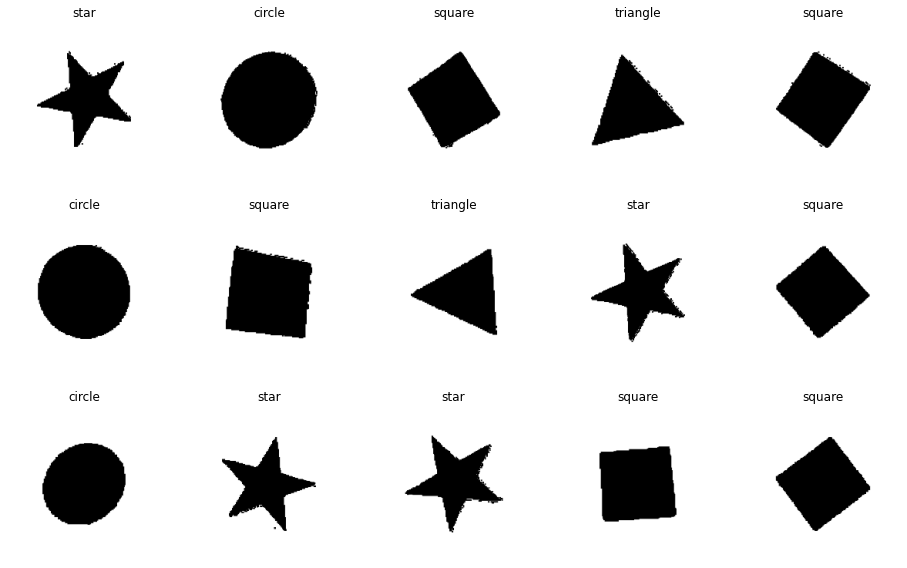

In [23]:
plt.figure(figsize=(16, 10))
for images, labels in train_data.take(1):
    for i in range(15):
        ax = plt.subplot(3, 5, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'), cmap='gray')
        plt.title(train_data.class_names[labels[i]])
        plt.axis("off")

#### Get baseline CNN model

In [24]:
model1 = define_baseline(num_classes=NUM_CLASSES)
model1.summary()
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 200, 200, 1)]     0         
_________________________________________________________________
resizing_3 (Resizing)        (None, 100, 100, 1)       0         
_________________________________________________________________
rescaling_3 (Rescaling)      (None, 100, 100, 1)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 100, 100, 8)       80        
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 50, 50, 8)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 50, 50, 16)        1168      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 25, 25, 16)       

#### Train baseline CNN model

In [26]:
history1 = model1.fit(train_data, validation_data=val_data, epochs=5)

Epoch 1/5
749/749 [==============================] - 78s 104ms/step - loss: 0.7927 - accuracy: 0.9568 - val_loss: 0.7460 - val_accuracy: 0.9983
Epoch 2/5
749/749 [==============================] - 72s 95ms/step - loss: 0.7478 - accuracy: 0.9972 - val_loss: 0.7464 - val_accuracy: 0.9980
Epoch 3/5
749/749 [==============================] - 78s 104ms/step - loss: 0.7455 - accuracy: 0.9986 - val_loss: 0.7447 - val_accuracy: 0.9990
Epoch 4/5
749/749 [==============================] - 80s 106ms/step - loss: 0.7456 - accuracy: 0.9983 - val_loss: 0.7447 - val_accuracy: 0.9990
Epoch 5/5
749/749 [==============================] - 81s 108ms/step - loss: 0.7456 - accuracy: 0.9987 - val_loss: 0.7468 - val_accuracy: 0.9977


#### Plot training curves for baseline model

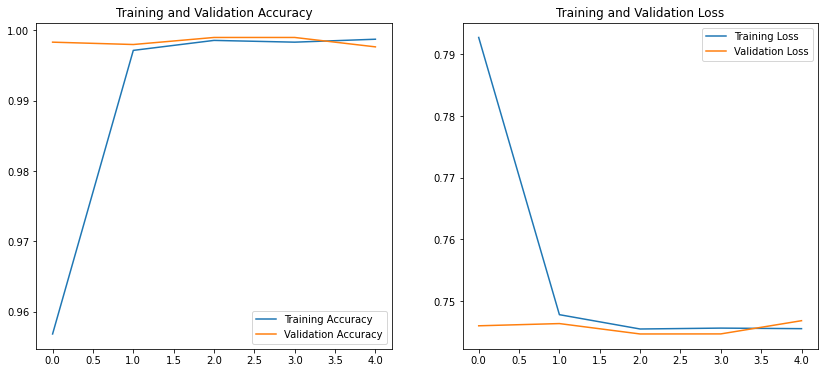

In [28]:
plot_training_curves(history1)

#### Add data augmentation strategy and visualize it on some training data

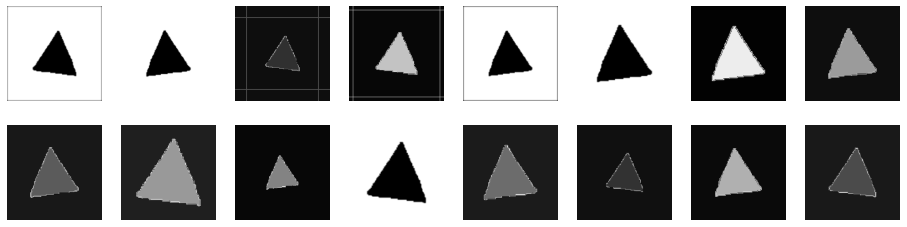

In [29]:
plt.figure(figsize=(16, 4))
for images, _ in train_data.take(1):
    for i in range(16):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(2, 8, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"),cmap='gray')
        plt.axis("off")

#### Define and train regularized model (adding data aug. and dropout to architecture)

In [30]:
model2 = define_regularized(num_classes=NUM_CLASSES)

model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model2.summary()

Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 200, 200, 1)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 200, 200, 1)       0         
_________________________________________________________________
resizing_4 (Resizing)        (None, 100, 100, 1)       0         
_________________________________________________________________
rescaling_4 (Rescaling)      (None, 100, 100, 1)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 100, 100, 16)      160       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 50, 50, 16)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 50, 50, 16)      

In [31]:
history2 = model2.fit(train_data, validation_data=val_data, epochs=5)

Epoch 1/5
749/749 [==============================] - 118s 158ms/step - loss: 0.9980 - accuracy: 0.7555 - val_loss: 0.7482 - val_accuracy: 0.9987
Epoch 2/5
749/749 [==============================] - 122s 163ms/step - loss: 0.7957 - accuracy: 0.9583 - val_loss: 0.7439 - val_accuracy: 1.0000
Epoch 3/5
749/749 [==============================] - 120s 160ms/step - loss: 0.7721 - accuracy: 0.9773 - val_loss: 0.7437 - val_accuracy: 1.0000
Epoch 4/5
749/749 [==============================] - 120s 160ms/step - loss: 0.7661 - accuracy: 0.9819 - val_loss: 0.7438 - val_accuracy: 0.9997
Epoch 5/5
749/749 [==============================] - 120s 161ms/step - loss: 0.7589 - accuracy: 0.9881 - val_loss: 0.7437 - val_accuracy: 1.0000


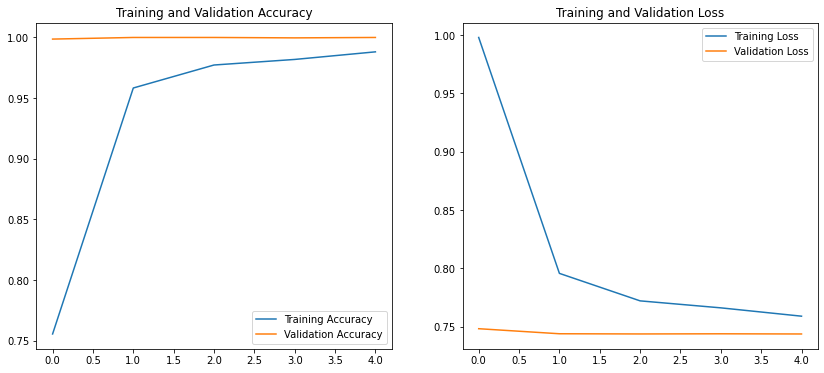

In [32]:
plot_training_curves(history2)

#### Evaluate results from both models on val and test data

In [33]:
model1.evaluate(test_data)
model1.evaluate(val_data)

model2.evaluate(test_data)
model2.evaluate(val_data)

188/188 [==============================] - 7s 36ms/step - loss: 0.7437 - accuracy: 1.0000


[0.7436680197715759, 1.0]

#### Plot test data prediction results from regularized model

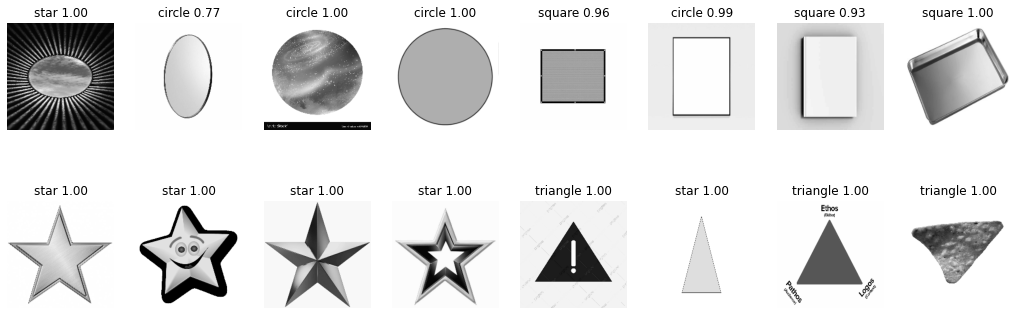

In [34]:
for images, labels in test_data.take(1):
    numpy_images = images.numpy()
    numpy_labels = labels.numpy()

predictions = model2.predict(numpy_images)   

plt.figure(figsize=(18, 6))
for i in range(16):
    ax = plt.subplot(2, 8, i + 1)
    plt.imshow(numpy_images[i].astype('uint8'), cmap='gray')
    class_name = val_data.class_names[np.argmax(predictions[i])]
    confidence = np.max(predictions[i])
    plt.title(class_name + ' ' + "{:.2f}".format(confidence))
    plt.axis("off")

#### Bonus: visualize feature maps after the 1st and 2nd convolutional layers

In [47]:
# summarize feature map shapes
for i in range(len(model2.layers)):
    layer = model2.layers[i]
    if 'conv' not in layer.name:
        continue
    print(i, layer.name, layer.output.shape)

4 conv2d_8 (None, 100, 100, 16)
7 conv2d_9 (None, 50, 50, 32)


Model: "functional_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 200, 200, 1)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 200, 200, 1)       0         
_________________________________________________________________
resizing_4 (Resizing)        (None, 100, 100, 1)       0         
_________________________________________________________________
rescaling_4 (Rescaling)      (None, 100, 100, 1)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 100, 100, 16)      160       
Total params: 160
Trainable params: 160
Non-trainable params: 0
_________________________________________________________________


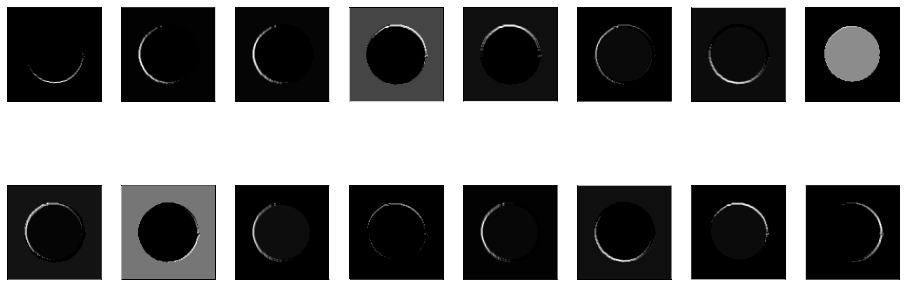

In [48]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model

# redefine model to output right after the first hidden layer
model = Model(inputs=model2.inputs, outputs=model2.layers[4].output)
model.summary()

img, = train_data.take(1)
img = img[0].numpy().astype("uint8")
img = img[1,:,:,:]

# expand dimensions so that it represents a single 'sample'
img = np.expand_dims(img, axis=0)

# get feature map for first hidden layer
feature_maps = model.predict(img)

plt.figure(figsize=(16, 6))
for i in range(16):
    ax = plt.subplot(2, 8, i + 1)
    plt.imshow(feature_maps[0,:,:,i],cmap='gray')
    plt.axis("off")

Model: "functional_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 200, 200, 1)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 200, 200, 1)       0         
_________________________________________________________________
resizing_4 (Resizing)        (None, 100, 100, 1)       0         
_________________________________________________________________
rescaling_4 (Rescaling)      (None, 100, 100, 1)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 100, 100, 16)      160       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 50, 50, 16)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 50, 50, 16)      

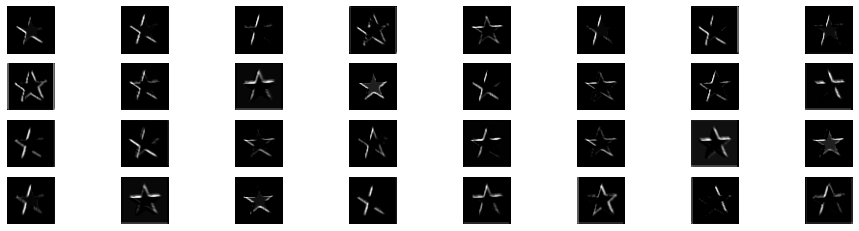

In [49]:
# redefine model to output right after the first hidden layer
model = Model(inputs=model2.inputs, outputs=model2.layers[7].output)
model.summary()

img, = train_data.take(1)
img = img[0].numpy().astype("uint8")
img = img[1,:,:,:]

# expand dimensions so that it represents a single 'sample'
img = np.expand_dims(img, axis=0)

# get feature map for first hidden layer
feature_maps = model.predict(img)

plt.figure(figsize=(16, 4))
for i in range(32):
    ax = plt.subplot(4, 8, i + 1)
    plt.imshow(feature_maps[0,:,:,i],cmap='gray')
    plt.axis("off")

#### Optional: save a model and load it back

In [50]:
model1.save("baseline.h5")
model2.save("regularized.h5")

In [52]:
model = load_model('regularized.h5')
model.summary()
#score = model.evaluate(test_data, verbose=1)

Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 200, 200, 1)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 200, 200, 1)       0         
_________________________________________________________________
resizing_4 (Resizing)        (None, 100, 100, 1)       0         
_________________________________________________________________
rescaling_4 (Rescaling)      (None, 100, 100, 1)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 100, 100, 16)      160       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 50, 50, 16)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 50, 50, 16)      